In [ ]:
#Deep Convolutional Neural Network
"""
Problem Type: Multi-class classification
Image size:   28x28
Samples:      60000
Input size:   60000 x 1 x 28 x 28
Convolutional Network Configuration:
    Number of RGB channels:                1
    Layers of CNN:                         2(Dense CNN) 
    Number of filters:                     30(at layer 1), 15(at layer 2) 
    Size of filters:                       5x5(at layer 1), 3x3(at layer 2)
    Polling Method used:                   Max-Polling
    Polling Size:                          2x2
    Layers of MLP:                         3
    Number of nodes in input MLP layer:    128
    Number of nodes in hidden MLP layer:   50
    Number of nodes in output MLP layer:   10
    Dropout percent:                       20%
    Activation function:                   Relu and Softmax(Output layer)
    Number of epochs:                      10
    Batch Size:                            200
"""

Using TensorFlow backend.


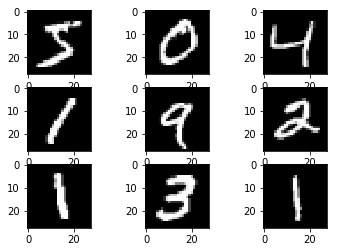

In [1]:
# Plot of images  
from keras.datasets import mnist 
from matplotlib import pyplot as plt

# load data 
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

# create a grid of 3x3 images 
for i in range(0, 9): 
    plt.subplot(331 + i) 
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))

# show the plot
plt.show()

In [2]:
# Dense CNN 

import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

# fix dimension ordering issue
from keras import backend as K
K.set_image_dim_ordering('th')
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][channels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# define a Deep CNN model
def Dense_CNN_model():
	# create model
	model = Sequential()
	model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Conv2D(15, (3, 3), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(50, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

# build the model
model = Dense_CNN_model()

# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 131s - loss: 0.3935 - acc: 0.8797 - val_loss: 0.1081 - val_acc: 0.9643
Epoch 2/10
60000/60000 [==============================] - 130s - loss: 0.0948 - acc: 0.9714 - val_loss: 0.0593 - val_acc: 0.9797
Epoch 3/10
60000/60000 [==============================] - 130s - loss: 0.0690 - acc: 0.9789 - val_loss: 0.0368 - val_acc: 0.9889
Epoch 4/10
60000/60000 [==============================] - 130s - loss: 0.0554 - acc: 0.9827 - val_loss: 0.0324 - val_acc: 0.9886
Epoch 5/10
60000/60000 [==============================] - 130s - loss: 0.0474 - acc: 0.9846 - val_loss: 0.0295 - val_acc: 0.9900
Epoch 6/10
60000/60000 [==============================] - 131s - loss: 0.0433 - acc: 0.9863 - val_loss: 0.0278 - val_acc: 0.9905
Epoch 7/10
60000/60000 [==============================] - 131s - loss: 0.0383 - acc: 0.9878 - val_loss: 0.0260 - val_acc: 0.9907
Epoch 8/10
60000/60000 [=======================

In [3]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 24, 24)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 12, 12)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 10, 10)        4065      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 5, 5)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 5, 5)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               48128     
__________

In [4]:
history.history.keys()

dict_keys(['val_acc', 'val_loss', 'loss', 'acc'])

dict_keys(['val_acc', 'val_loss', 'loss', 'acc'])


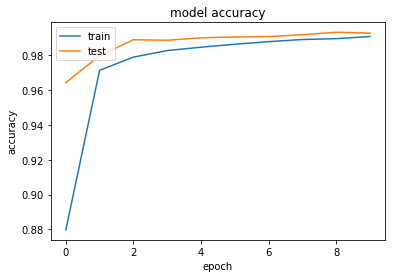

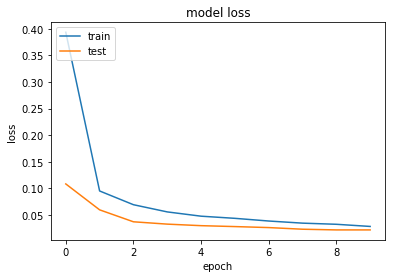

In [5]:
from matplotlib import pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()